# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
import json
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3
house_ave_inc = 12000
spy_stocks = 50
agg_bonds = 200

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
# Fetch current BTC price
btc_price = requests.get(btc_url).json()
print(json.dumps(btc_price, indent=4))
# fetch current ETH price 
eth_price = requests.get(eth_url).json()
print(json.dumps(eth_price, indent=4))


btc = btc_price['data']['1']['quotes']['USD']['price']
print(f'Current price of BTC: {btc}')
eth = eth_price['data']['1027']['quotes']['USD']['price']
print(f'Current price of ETH: {eth}')



{
    "data": {
        "1": {
            "id": 1,
            "name": "Bitcoin",
            "symbol": "BTC",
            "website_slug": "bitcoin",
            "rank": 1,
            "circulating_supply": 19002800,
            "total_supply": 19002800,
            "max_supply": 21000000,
            "quotes": {
                "USD": {
                    "price": 46181.0,
                    "volume_24h": 28513126003,
                    "market_cap": 873114602995,
                    "percentage_change_1h": 0.876471412113552,
                    "percentage_change_24h": -0.553435884635763,
                    "percentage_change_7d": -1.1437506891746,
                    "percent_change_1h": 0.876471412113552,
                    "percent_change_24h": -0.553435884635763,
                    "percent_change_7d": -1.1437506891746
                },
                "CAD": {
                    "price": 57656.9785,
                    "volume_24h": 35598637814.7455,
                   

In [6]:
# Compute current value of my crpto
my_btc_value = btc * my_btc
my_eth_value = eth * my_eth
total_crypto = my_btc_value + my_eth_value
# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")
print(f"The total value of all crypto is {total_crypto:0.2f}")

The current value of your 1.2 BTC is $55417.20
The current value of your 5.3 ETH is $18569.24
The total value of all crypto is 73986.44


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [7]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [8]:
# Set Alpaca API key and secret
ALPACA_API_KEY = 'PKJEJBTB8UT7MVPCMRNQ'
ALPACA_SECRET_KEY= 'rEHBrZqbj1sHVusntKofW44NujORNb00kANTkkEB'

# Create the Alpaca API object
alpaca = tradeapi.REST(ALPACA_API_KEY, ALPACA_SECRET_KEY, api_version = "v2")

In [9]:
# Format current date as ISO format
start_date = pd.Timestamp("2022-04-01", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2022-04-01", tz="America/New_York").isoformat()
# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
df_tickers = alpaca.get_bars(tickers, timeframe, start=start_date, end=end_date, limit=1000).df

# Preview DataFrame
df_tickers

,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2022-04-01 04:00:00+00:00,106.35,106.95,106.25,106.75,11579091,40126,106.667931,AGG
2022-04-01 04:00:00+00:00,453.30,453.46,449.14,452.92,88676014,624745,451.850848,SPY


In [10]:
# Pick AGG and SPY close prices
agg_close_price = df_tickers['close'][0]
spy_close_price = df_tickers['close'][1]
# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $106.75
Current SPY closing price: $452.92


In [11]:
# Compute the current value of shares
my_spy_value = my_spy * spy_close_price
my_agg_value = my_agg * agg_close_price
# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $22646.00
The current value of your 200 AGG shares is $21350.00


### Savings Health Analysis

In [12]:
# Consolidate financial assets data
monthly_income = 12000
shares = my_spy_value + my_agg_value
crypto = my_btc_value + my_eth_value
print(f"The total value of all crypto is {crypto:0.2f}")
print(f"The total value of all shares is {shares:0.2f}")

The total value of all crypto is 73986.44
The total value of all shares is 43996.00


In [13]:
savings = [['Crypto', 74593.44], ['Shares', 43996.00]]
columns = ['amount']
# Create savings DataFrame
df_savings = pd.DataFrame(savings, index=['Crypto', 'Shares'])
df_savings = df_savings.drop(columns=[0])
df_savings.columns = columns
# Display savings DataFrame
df_savings

,amount
Crypto,74593.44
Shares,43996.00


array([<AxesSubplot:ylabel='amount'>], dtype=object)

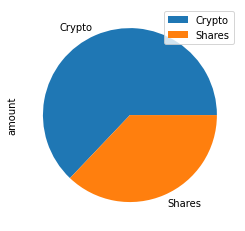

In [14]:
# Plot savings pie chart
df_savings.plot(kind='pie', subplots=True)

In [15]:
# Set ideal emergency fund <<change the amount after asteric to make sure it runs>>> it does btw 
emergency_fund = monthly_income * 5

# Calculate total amount of savings
total_savings = shares + crypto
# Validate saving health
if total_savings > emergency_fund:
    print(f"YOU DID IT YOU HAVE ENOUGH MONEY IN THIS FUND!")
elif total_savings == emergency_fund:
    print(f"Hey good job you just barely made it")
elif total_savings < emergency_fund:
    print(f"Hey you are {total_savings - emergency_fund:0.2f} Dollars away from goal")

YOU DID IT YOU HAVE ENOUGH MONEY IN THIS FUND!


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [20]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date2 = pd.Timestamp('2016-04-01', tz='America/New_York').isoformat()
end_date2 = pd.Timestamp('2021-04-01', tz='America/New_York').isoformat()
num_sim = 1000

In [21]:
# Get 5 years' worth of historical data for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data
df_stock = alpaca.get_bars(tickers, timeframe, start=start_date2, end=end_date2, limit=10000).df
AGG = df_stock[df_stock['symbol']=='AGG'].drop('symbol', axis=1)
SPY = df_stock[df_stock['symbol']=='SPY'].drop('symbol', axis=1)
df_stock = pd.concat([AGG, SPY], axis=1, keys=['AGG', 'SPY'])
# Display sample data
df_stock

AGG                                        \
                             open      high       low   close    volume   
timestamp                                                                 
2016-04-01 04:00:00+00:00  110.53  110.6599  110.3500  110.51   5374230   
2016-04-04 04:00:00+00:00  110.60  110.6700  110.5100  110.62   3176154   
2016-04-05 04:00:00+00:00  110.87  110.9750  110.7100  110.77   2954123   
2016-04-06 04:00:00+00:00  110.80  110.8000  110.6235  110.75   2027437   
2016-04-07 04:00:00+00:00  110.98  111.0500  110.7700  110.99   1876140   
...                           ...       ...       ...     ...       ...   
2021-03-26 04:00:00+00:00  113.91  114.0750  113.8600  113.91   4333939   
2021-03-29 04:00:00+00:00  113.95  114.0000  113.5200  113.72   7630810   
2021-03-30 04:00:00+00:00  113.64  113.8500  113.5250  113.81   4996946   
2021-03-31 04:00:00+00:00  113.84  113.9800  113.7100  113.83   6309151   
2021-04-01 04:00:00+00:00  113.93  114.0500  113.8300  114.04  10766423   

                                                      SPY                    \
                          trade_count        vwap    open      high     low   
timestamp                                                                     
2016-04-01 04:00:00+00:00       15909  110.508405  204.35  207.1400  203.98   
2016-04-04 04:00:00+00:00        9671  110.566831  206.84  207.0700  205.89   
2016-04-05 04:00:00+00:00       11700  110.807661  204.64  206.2642  203.89   
2016-04-06 04:00:00+00:00       10157  110.707187  204.27  206.4900  203.98   
2016-04-07 04:00:00+00:00        8054  110.986625  205.18  205.5600  203.09   
...                               ...         ...     ...       ...     ...   
2021-03-26 04:00:00+00:00       14434  113.952580  390.98  396.4100  390.29   
2021-03-29 04:00:00+00:00       16854  113.736775  394.35  396.7500  392.81   
2021-03-30 04:00:00+00:00       21629  113.725016  394.35  395.4500  393.02   
2021-03-31 04:00:00+00:00       20046  113.851382  395.35  398.0000  395.31   
2021-04-01 04:00:00+00:00       31622  113.979773  398.34  400.6700  398.18   

                                                                      
                            close     volume trade_count        vwap  
timestamp                                                             
2016-04-01 04:00:00+00:00  206.91  114405478      397066  206.036128  
2016-04-04 04:00:00+00:00  206.29   63495969      249269  206.409892  
2016-04-05 04:00:00+00:00  204.14   99662158      351543  204.579339  
2016-04-06 04:00:00+00:00  206.46   91834261      391426  205.374770  
2016-04-07 04:00:00+00:00  203.89  113859037      411645  204.378824  
...                           ...        ...         ...         ...  
2021-03-26 04:00:00+00:00  395.98  114659214      586090  392.527076  
2021-03-29 04:00:00+00:00  395.78  108155969      609262  395.200236  
2021-03-30 04:00:00+00:00  394.73   76263758      435225  394.453270  
2021-03-31 04:00:00+00:00  396.33  112826049      481278  396.340504  
2021-04-01 04:00:00+00:00  400.61   99157757      386557  398.274085  

[1260 rows x 14 columns]

In [22]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirtyyear = MCSimulation(portfolio_data = df_stock,
                            num_simulation = num_sim,
                            weights = [.40,.60],
                            num_trading_days = 252 * 30)

In [23]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirtyyear.portfolio_data.head()

AGG                                       \
                             open      high       low   close   volume   
timestamp                                                                
2016-04-01 04:00:00+00:00  110.53  110.6599  110.3500  110.51  5374230   
2016-04-04 04:00:00+00:00  110.60  110.6700  110.5100  110.62  3176154   
2016-04-05 04:00:00+00:00  110.87  110.9750  110.7100  110.77  2954123   
2016-04-06 04:00:00+00:00  110.80  110.8000  110.6235  110.75  2027437   
2016-04-07 04:00:00+00:00  110.98  111.0500  110.7700  110.99  1876140   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2016-04-01 04:00:00+00:00       15909  110.508405          NaN  204.35   
2016-04-04 04:00:00+00:00        9671  110.566831     0.000995  206.84   
2016-04-05 04:00:00+00:00       11700  110.807661     0.001356  204.64   
2016-04-06 04:00:00+00:00       10157  110.707187    -0.000181  204.27   
2016-04-07 04:00:00+00:00        8054  110.986625     0.002167  205.18   

                                                                            \
                               high     low   close     volume trade_count   
timestamp                                                                    
2016-04-01 04:00:00+00:00  207.1400  203.98  206.91  114405478      397066   
2016-04-04 04:00:00+00:00  207.0700  205.89  206.29   63495969      249269   
2016-04-05 04:00:00+00:00  206.2642  203.89  204.14   99662158      351543   
2016-04-06 04:00:00+00:00  206.4900  203.98  206.46   91834261      391426   
2016-04-07 04:00:00+00:00  205.5600  203.09  203.89  113859037      411645   

                                                    
                                 vwap daily_return  
timestamp                                           
2016-04-01 04:00:00+00:00  206.036128          NaN  
2016-04-04 04:00:00+00:00  206.409892    -0.002996  
2016-04-05 04:00:00+00:00  204.579339    -0.010422  
2016-04-06 04:00:00+00:00  205.374770     0.011365  
2016-04-07 04:00:00+00:00  204.378824    -0.012448

In [24]:
# Printing the simulation input data
MC_thirtyyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/dadslaptop/Desktop/ASU_BOOTCAMP/GitHub/ASU-VIRT-FIN-PT-03-2022-U-LOL/05-APIs/Homework/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.006575,0.998177,0.985464,1.000064,0.999081,1.010489,0.998253,1.006305,1.016358,0.996663,...,1.012555,0.988360,1.002248,1.010280,1.018967,0.996434,0.991034,1.001011,1.002410,0.999650
2,1.004798,0.991562,0.989596,1.003645,0.995705,1.010116,1.002945,1.011406,1.023807,1.001253,...,1.013399,0.985596,1.007809,1.010171,1.031093,1.006663,0.991033,0.986895,0.993603,0.998300
3,1.007965,0.995715,0.983246,0.987167,1.006102,1.003276,0.984682,1.005938,1.035712,1.010227,...,1.008493,0.977340,1.013178,1.006820,1.038244,1.016909,0.997740,0.987651,0.995523,0.989375
4,0.998297,0.998842,0.984522,0.996245,1.017558,1.011037,0.976711,1.011855,1.022974,1.009899,...,1.013104,0.983026,1.020869,1.013502,1.030950,1.014706,1.004693,1.002516,0.994194,0.987999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,22.807320,2.301911,20.565709,14.071836,53.498459,52.085454,8.054062,15.386304,9.864184,7.919399,...,9.017754,19.436864,18.333169,9.317187,9.168047,16.546921,7.401211,17.880785,15.398728,6.439732
7557,22.771509,2.298345,20.527906,14.005641,53.062657,51.846276,8.032950,15.140439,9.955371,7.975400,...,8.978773,19.267673,18.353411,9.392382,9.060625,16.512577,7.456318,17.784284,15.308852,6.455267
7558,23.023599,2.329464,20.700223,14.008500,53.760389,52.120424,7.979252,15.311761,9.868123,7.843811,...,8.920873,19.436033,18.332283,9.386951,8.993498,16.638205,7.491222,17.796044,15.364269,6.423801
7559,23.257484,2.323538,20.643034,14.124203,53.270329,52.079074,8.000416,15.448270,9.850646,7.890282,...,8.833630,19.404939,18.488150,9.340645,8.971976,16.612128,7.469869,17.925663,15.286854,6.488947


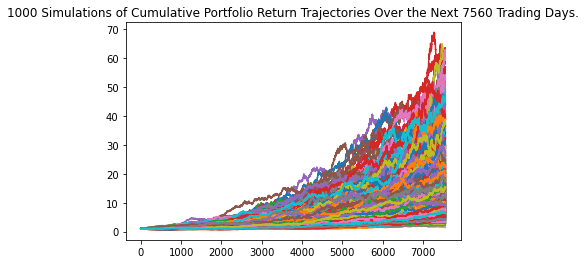

In [27]:
# Plot simulation outcomes
line_plot = MC_thirtyyear.plot_simulation()

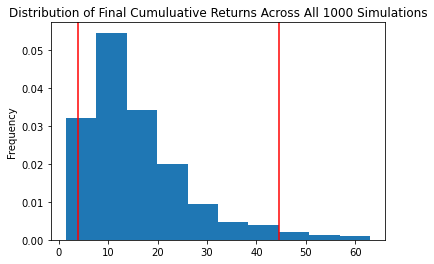

In [28]:
# Plot probability distribution and confidence intervals
dist_plot = MC_thirtyyear.plot_distribution()

### Retirement Analysis

In [34]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_thirtyyear.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           1000.000000
mean              15.774850
std               10.377766
min                1.460840
25%                8.409445
50%               13.125207
75%               20.122189
max               62.976452
95% CI Lower       3.876820
95% CI Upper      44.469876
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [37]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tbl[8]*20000,2)
ci_upper = round(tbl[9]*20000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $77536.39 and $889397.53


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [42]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(tbl[8]*(initial_investment),2)
ci_upper = round(tbl[9]*(initial_investment),2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $116304.59 and $1334096.29


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [51]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_fiveyear = MCSimulation(portfolio_data = df_stock,
                            num_simulation = num_sim,
                            weights = [.60,.40],
                            num_trading_days = 252 * 5)

In [52]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_fiveyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/dadslaptop/Desktop/ASU_BOOTCAMP/GitHub/ASU-VIRT-FIN-PT-03-2022-U-LOL/05-APIs/Homework/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.996073,0.999140,0.995235,0.998123,1.002937,0.996620,1.000992,1.006944,1.009540,1.005720,...,1.000104,1.000188,1.008931,1.010760,0.992528,0.996510,0.992129,1.003130,0.996805,0.997275
2,0.994408,0.989792,0.990916,0.996445,1.011645,0.996016,1.005689,1.003954,1.007156,1.012456,...,0.999468,1.003080,1.006541,1.012849,0.993197,1.004222,0.984386,1.005179,1.000879,0.999475
3,1.001012,0.985573,0.987748,0.991807,1.012440,0.997837,1.009942,1.004566,1.011024,1.013237,...,0.994101,1.005860,1.007305,1.014219,0.999622,1.008718,0.983678,1.004106,0.995481,1.000105
4,1.000572,0.978992,0.977226,0.990702,1.010800,1.002395,1.009911,1.005078,1.010340,1.008598,...,0.997747,1.007238,0.995331,1.016410,1.000235,1.008932,0.983400,1.001652,0.989653,0.990326
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.207184,1.291169,1.314091,1.701502,1.432521,1.132210,2.137361,1.400410,1.250022,1.311951,...,1.274178,1.137761,1.293695,1.292040,0.896873,1.190441,1.689988,1.260669,1.652829,1.322981
1257,1.204337,1.298749,1.318015,1.696181,1.431515,1.147182,2.118593,1.394976,1.247708,1.314839,...,1.274704,1.129636,1.293843,1.289958,0.899892,1.190756,1.691204,1.271718,1.650435,1.322247
1258,1.215600,1.298725,1.311344,1.693154,1.438481,1.149268,2.133308,1.395081,1.244847,1.312837,...,1.264644,1.123261,1.294349,1.285471,0.897950,1.190849,1.695299,1.273541,1.658944,1.323007
1259,1.217401,1.297257,1.301861,1.676715,1.426547,1.155522,2.122279,1.406065,1.254050,1.315420,...,1.261256,1.131021,1.288619,1.284030,0.896629,1.186271,1.698605,1.274618,1.674556,1.329759


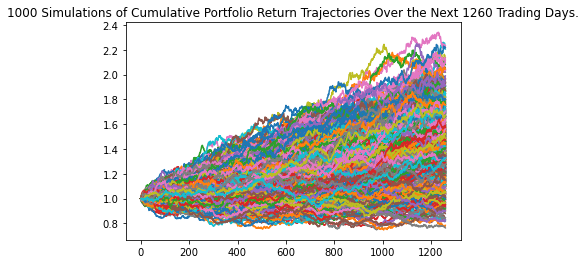

In [55]:
# Plot simulation outcomes
line_plot = MC_fiveyear.plot_simulation()

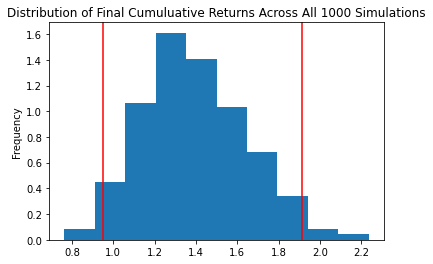

In [56]:
# Plot probability distribution and confidence intervals
dist_plot = MC_fiveyear.plot_distribution()

In [58]:
# Fetch summary statistics from the Monte Carlo simulation results remember return is not plural!!!
tbl_five = MC_fiveyear.summarize_cumulative_return()
# Print summary statistics
print(tbl_five)

count           1000.000000
mean               1.393607
std                0.250475
min                0.763457
25%                1.213831
50%                1.373797
75%                1.552545
max                2.234899
95% CI Lower       0.951402
95% CI Upper       1.910658
Name: 1260, dtype: float64


In [62]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_upper_five = round(tbl_five[8]* (initial_investment),2)
ci_lower_five = round(tbl_five[9]*(initial_investment),2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $114639.48 and $57084.09


### Ten Years Retirement Option

In [53]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_tenyear = MCSimulation(portfolio_data = df_stock,
                            num_simulation = num_sim,
                            weights = [.50,.50],
                            num_trading_days = 252 * 10)

In [54]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_tenyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/dadslaptop/Desktop/ASU_BOOTCAMP/GitHub/ASU-VIRT-FIN-PT-03-2022-U-LOL/05-APIs/Homework/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.998978,1.012488,1.008874,0.999671,1.015398,1.004671,0.996800,1.000959,0.999921,0.994699,...,1.003709,0.996318,0.996605,0.996985,1.003913,1.000577,1.002424,0.996950,1.002756,1.002604
2,0.996824,1.013170,0.996410,1.013188,1.008415,0.996265,1.005946,0.995245,0.998628,0.985401,...,1.004584,1.006725,0.987349,1.006990,1.000926,0.996506,0.994746,0.996188,0.995278,1.003251
3,1.004406,1.012999,0.989254,1.001027,1.011352,0.996436,1.006173,0.999603,0.994154,0.992235,...,1.002047,0.997711,0.985796,1.002963,1.011322,0.994487,0.986071,0.997490,1.005219,0.999382
4,1.001493,1.008512,0.999201,1.009545,1.015004,0.995959,1.009798,1.011562,0.994524,0.981169,...,1.001444,0.994391,0.993146,1.008774,1.023136,0.991734,0.975847,0.993409,1.003163,1.001461
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,2.302029,2.077000,2.794942,1.862145,1.257123,1.767226,3.143810,1.920607,1.922264,2.627125,...,2.943757,2.007850,2.878581,2.453961,2.682106,1.380907,2.215689,2.427384,2.131589,2.036303
2517,2.290578,2.077602,2.762006,1.866204,1.258648,1.782552,3.154259,1.897745,1.930902,2.627301,...,2.945719,2.006646,2.845107,2.434357,2.698803,1.390207,2.251782,2.427991,2.129053,2.045956
2518,2.298251,2.069072,2.796628,1.873524,1.255752,1.771644,3.169359,1.896135,1.930133,2.637192,...,2.945709,2.013203,2.823444,2.452985,2.710459,1.385333,2.258696,2.451410,2.118522,2.065220
2519,2.324955,2.057258,2.821112,1.868505,1.269145,1.769415,3.139442,1.890480,1.916749,2.645571,...,2.939136,2.004723,2.842490,2.453241,2.697359,1.390851,2.245870,2.449097,2.097907,2.087449


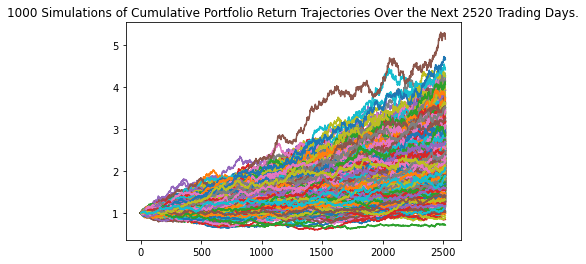

In [64]:
# Plot simulation outcomes
line_plot2 = MC_tenyear.plot_simulation()

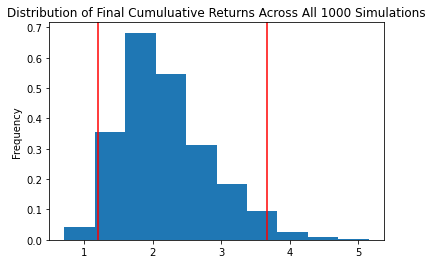

In [65]:
# Plot probability distribution and confidence intervals
dist_plot2 = MC_tenyear.plot_distribution()

In [67]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_ten = MC_tenyear.summarize_cumulative_return()
# Print summary statistics
print(tbl_ten)

count           1000.000000
mean               2.187314
std                0.656401
min                0.709246
25%                1.717351
50%                2.074823
75%                2.556853
max                5.150487
95% CI Lower       1.202221
95% CI Upper       3.672209
Name: 2520, dtype: float64


In [68]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_upper_ten = round(tbl_ten[8]* (initial_investment),2)
ci_lower_ten = round(tbl_ten[9]*(initial_investment),2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $220332.54 and $72133.26
